# Metropolis-Hastings for inference of Normal distribution parameters

The normal distribution is given by

$$
p(x|\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{(x-\mu)^2}{2 \sigma^2} \Big)
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.

Suppose $N$ samples are drawn from the normal distribution $x_0, x_1, \ldots, x_{N-1}$. The problem is to estimate the parameters $\mu$ and $\sigma$.

The prior probability of the mean is modelled as a uniform distribution

$$
p(\mu) = 
\begin{cases}
 \frac{1}{\mu_b - \mu_a} & \mu_a \leq \mu \leq \mu_b \\
 0             & \text{otherwise} \\
\end{cases}
$$

and the prior probability of the standard deviation is also modelled as a uniform distribution

$$
p(\sigma) = 
\begin{cases}
 \frac{1}{\sigma_c} & 0 \leq \sigma \leq \sigma_c \\
 0             & \text{otherwise} \\
\end{cases}
$$

The probability of $N$ samples is given by

$$
p(x | \mu, \sigma) = \prod_{i=0}^{N-1} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{(x-\mu)^2}{2 \sigma^2} \Big).
$$

The natural logarithm of the probability of the samples is given by

$$
\begin{align*}
\ln p(x | \mu, \sigma) &= \ln \Big( \prod_{i=0}^{N-1} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{(x-\mu)^2}{2 \sigma^2} \Big) \Big) \\
         &= \sum_{i=0}^{N-1} \ln \Big( \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{(x-\mu)^2}{2 \sigma^2} \Big) \Big) \\
         &= \sum_{i=0}^{N-1} \Big( \ln 1 - \ln \sqrt{2 \pi \sigma^2} - \frac{(x-\mu)^2}{2 \sigma^2} \Big) \\
         &= - N \ln \sqrt{2 \pi \sigma^2} - \sum_{i=0}^{N-1} \frac{(x-\mu)^2}{2 \sigma^2} \\
         &= - \frac{N}{2} \ln (2 \pi \sigma^2) - \sum_{i=0}^{N-1} \frac{(x-\mu)^2}{2 \sigma^2} \\
\end{align*}
$$

The natural logarithm of the uniform prior for the mean is given by

$$
\begin{align*}
\ln p(\mu) &= \ln \frac{1}{\mu_b - \mu_a} \\
               &= \ln (\mu_b - \mu_a)^{-1}  \\
               &= - \ln (\mu_b - \mu_a) \\
\end{align*}
$$

where $\mu_a \leq \mu \leq \mu_b$.

The natural logarithm of the prior probability of the standard deviation is given by

$$
\begin{align*}
\ln p(\sigma) &= \ln \frac{1}{\sigma_c} \\
              &= \ln (\sigma_c)^{-1}  \\
              &= - \ln (\sigma_c) \\
\end{align*}
$$

where $0 \leq \sigma \leq \sigma_c$.

From Bayes' theorem:

$$
\begin{align*}
p(\mu, \sigma | x) &= \frac{p(x | \mu, \sigma) p(\mu) p(\sigma)}{p(x)} \\
&\propto p(x | \mu, \sigma) p(\mu) p(\sigma)
\end{align*}
$$

where the independence of the prior distributions allows $p(\mu)$ and $p(\sigma)$ to be separated.

$$
\begin{align*}
\ln p(x | \mu, \sigma) p(\mu) p(\sigma) &= \ln p(x | \mu, \sigma) + \ln p(\mu) + \ln p(\sigma) \\
  &= - \frac{N}{2} \ln (2 \pi \sigma^2) - \sum_{i=0}^{N-1} \frac{(x-\mu)^2}{2 \sigma^2} - \ln (\mu_b - \mu_a) - \ln (\sigma_c) \\
\end{align*}
$$

where $\mu_a \leq \mu \leq \mu_b$ and $0 \leq \sigma \leq \sigma_c$.

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
mu_a = 10.0
mu_b = 20.0
sigma_c = 5.0

# Number of samples
N = 100

# Sample the mean and standard deviations
mu = np.random.uniform(mu_a, mu_b)
sigma = np.random.uniform(0, sigma_c)
print(f"Mean = {mu}, sigma = {sigma}")

# Draw samples from the normal distribution
x = np.random.normal(loc=mu, scale=sigma, size=N)

Mean = 17.268987208712264, sigma = 3.676024373262053


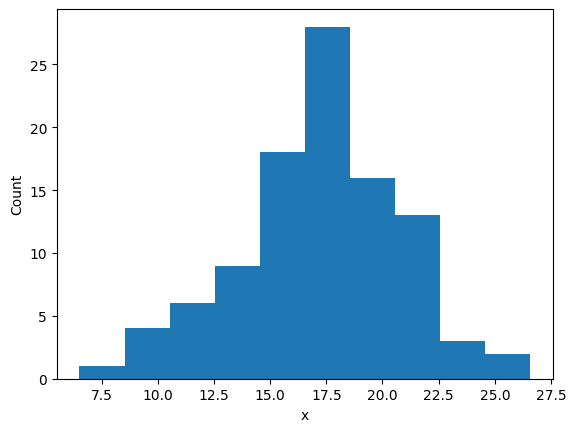

In [79]:
plt.hist(x)
plt.xlabel('x')
plt.ylabel('Count')
plt.show()

The joint distribution is given by

$$
\begin{align*}
\ln p(x | \mu, \sigma) p(\mu) p(\sigma) &= \ln p(x | \mu, \sigma) + \ln p(\mu) + \ln p(\sigma) \\
  &= - \frac{N}{2} \ln (2 \pi \sigma^2) - \sum_{i=0}^{N-1} \frac{(x-\mu)^2}{2 \sigma^2} - \ln (\mu_b - \mu_a) - \ln (\sigma_c) \\
\end{align*}
$$

where $\mu_a \leq \mu \leq \mu_b$ and $0 \leq \sigma \leq \sigma_c$.

In [80]:
def joint(mu, sigma, x, mu_a, mu_b, sigma_c):

    # Check that the parameters are in the required ranges
    if mu < mu_a or mu > mu_b:
        return 0.0
    elif sigma < 0 or sigma > sigma_c:
        return 0.0

    N = len(x)
    sigma_squared = np.pow(sigma, 2)

    # Log probability
    p = -(N/2) * np.log(2 * np.pi * sigma_squared) - \
        np.sum(np.pow(x - mu, 2) / (2 * sigma_squared)) - \
        np.log(mu_b - mu_a) - \
        np.log(sigma_c)
    
    return np.exp(p)

In [81]:
mu_samples = [(mu_b + mu_a)/2]
sigma_samples = [sigma_c/2]

number_accepted = 0
proposal_sigma = 0.5
M = 5000

for i in range(1, M):
    mu_candidate = np.random.normal(mu_samples[i-1], proposal_sigma)
    sigma_candidate = np.random.normal(sigma_samples[i-1], proposal_sigma)

    q_prev = joint(mu_samples[i-1], sigma_samples[i-1], x, mu_a, mu_b, sigma_c)
    q_candidate = joint(mu_candidate, sigma_candidate, x, mu_a, mu_b, sigma_c)

    acceptance_prob = min(1, q_candidate/q_prev)
    
    u = np.random.uniform(0, 1)
    
    if q_candidate == 0 or u >= acceptance_prob:
        mu_samples.append(mu_samples[i-1])
        sigma_samples.append(sigma_samples[i-1])

    else:
        # Accept the proposal
        mu_samples.append(mu_candidate)
        sigma_samples.append(sigma_candidate)
        number_accepted += 1

print(f"Percentage of samples accepted = {100.0 * number_accepted / M}")

Percentage of samples accepted = 35.66


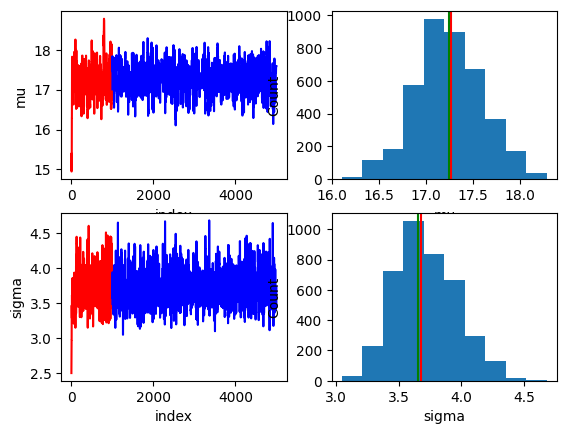

In [82]:
burnin = int(len(mu_samples) / 5)

plt.subplot(221)
plt.plot(np.arange(burnin), mu_samples[0:burnin], 'r')
plt.plot(np.arange(burnin,M), mu_samples[burnin:], 'b')
plt.xlabel('index')
plt.ylabel('mu')

plt.subplot(222)
plt.hist(mu_samples[burnin:])
plt.axvline(x=mu, color='r')
plt.axvline(x=np.mean(x), color='g')
plt.xlabel('mu')
plt.ylabel('Count')

plt.subplot(223)
plt.plot(np.arange(burnin), sigma_samples[0:burnin], 'r')
plt.plot(np.arange(burnin,M), sigma_samples[burnin:], 'b')
plt.xlabel('index')
plt.ylabel('sigma')

plt.subplot(224)
plt.hist(sigma_samples[burnin:])
plt.axvline(x=sigma, color='r')
plt.axvline(x=np.std(x), color='g')
plt.xlabel('sigma')
plt.ylabel('Count')

plt.show()